In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse,rmse

%matplotlib inline
pd.options.display.float_format= "{:.3f}".format

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("Desktop/Bootcamp Ödevler/house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
ozellikler=  ["SalePrice","LotArea", "YearBuilt", "BldgType", "Heating", "GarageQual"]
df2 = df.copy()
for i in df.columns:
    if i not in ozellikler:
        df2.drop([i], inplace=True, axis=1)
df2.head()

,LotArea,BldgType,YearBuilt,Heating,GarageQual,SalePrice
0,8450,1Fam,2003,GasA,TA,208500
1,9600,1Fam,1976,GasA,TA,181500
2,11250,1Fam,2001,GasA,TA,223500
3,9550,1Fam,1915,GasA,TA,140000
4,14260,1Fam,2000,GasA,TA,250000


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
LotArea       1460 non-null int64
BldgType      1460 non-null object
YearBuilt     1460 non-null int64
Heating       1460 non-null object
GarageQual    1379 non-null object
SalePrice     1460 non-null int64
dtypes: int64(3), object(3)
memory usage: 68.6+ KB


Getdummies

In [5]:
dummies = ["BldgType", "Heating", "GarageQual"]
df3 = pd.concat([df2, pd.get_dummies(df2[dummies])], axis=1)
df3.drop(dummies, axis=1, inplace=True)
df3.head()

,LotArea,YearBuilt,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,8450,2003,208500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,9600,1976,181500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,11250,2001,223500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,9550,1915,140000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,14260,2000,250000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [6]:
aciklayicilar= []
for i in df3.columns:
    if i != "SalePrice":
        aciklayicilar.append(i)

In [14]:
Y= df3["SalePrice"]
X= df3[['LotArea',
 'YearBuilt',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA',]]
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
sonuclar= sm.OLS(Y_train, X_train).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     48.27
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          1.02e-110
Time:                        16:00:49   Log-Likelihood:                -14573.
No. Observations:                1168   AIC:                         2.918e+04
Df Residuals:                    1152   BIC:                         2.926e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.008e+06   9.93e+04    -20.227      0.000    -2.2e+06   -1.81e+06
LotArea             1.9064      0.216      8.806      0.000       1.482       2.331
YearBuilt        1491.9765     71.696     20.810      0.000    1351.308    1632.645
BldgType_1Fam   -3.762e+05   2.02e+04    -18.651      0.000   -4.16e+05   -3.37e+05
BldgType_2fmCon -3.803e+05   2.07e+04    -18.389      0.000   -4.21e+05    -3.4e+05
BldgType_Duplex -4.106e+05   2.17e+04    -18.909      0.000   -4.53e+05   -3.68e+05
BldgType_Twnhs  -4.298e+05   2.32e+04    -18.553      0.000   -4.75e+05   -3.84e+05
BldgType_TwnhsE -4.108e+05   2.25e+04    -18.231      0.000   -4.55e+05   -3.67e+05
Heating_Floor    1.113e-10    1.5e-11      7.421      0.000    8.19e-11    1.41e-10
Heating_GasA    -4.183e+05   2.48e+04    -16.886      0.000   -4.67e+05    -3.7e+05
Heating_GasW    -3.558e+05   2.67e+04    -13.326      0.000   -4.08e+05   -3.03e+05
Heating_Grav    -4.388e+05   3.69e+04    -11.903      0.000   -5.11e+05   -3.66e+05
Heating_OthW    -3.459e+05   4.29e+04     -8.071      0.000    -4.3e+05   -2.62e+05
Heating_Wall    -4.489e+05   3.83e+04    -11.713      0.000   -5.24e+05   -3.74e+05
GarageQual_Ex     2.13e+05   4.61e+04      4.622      0.000    1.23e+05    3.03e+05
GarageQual_Fa    2.981e+04   1.33e+04      2.234      0.026    3626.640     5.6e+04
GarageQual_Gd    8.382e+04   2.11e+04      3.976      0.000    4.25e+04    1.25e+05
GarageQual_Po    6577.1040    4.9e+04      0.134      0.893   -8.95e+04    1.03e+05
GarageQual_TA    2.772e+04   9000.650      3.079      0.002    1.01e+04    4.54e+04
==============================================================================
Omnibus:                      634.205   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7075.137
Skew:                           2.274   Prob(JB):                         0.00
Kurtosis:                      14.167   Cond. No.                     1.72e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.68e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
print("Eğitim kümesi eleman sayısı: {}".format(X_train.shape[0]))
print("Test kümesindeki eleman sayısı: {}".format(X_test.shape[0]))

Eğitim kümesi eleman sayısı: 1168
Test kümesindeki eleman sayısı: 292


### Tahmin modeli

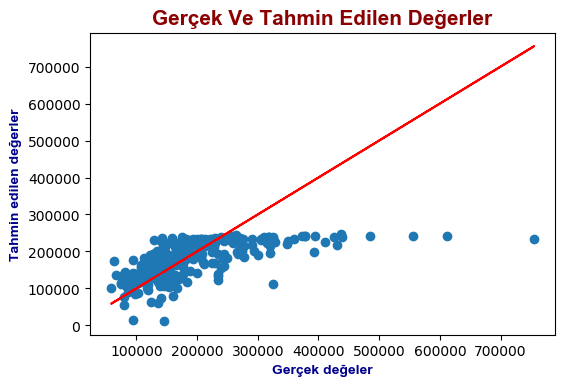

In [9]:
X_test= sm.add_constant(X_test)
Y_preds= sonuclar.predict(X_test)

baslik_font= {"family": "arial", "weight": "bold", "color": "darkred", "size": 15}
eksen_font= {"family": "arial", "weight": "bold", "color": "darkblue", "size": 10}

plt.figure(dpi=100)

plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.title("Gerçek Ve Tahmin Edilen Değerler", fontdict=baslik_font)
plt.xlabel("Gerçek değeler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen değerler", fontdict=eksen_font)
plt.show()


In [10]:
print("Ortalama mutlak hata (MAE): {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Ortalama kare hata (MSE): {}".format(mse(Y_test, Y_preds)))
print("Kök ortalama kare hata (RMSE): {}".format(rmse(Y_test, Y_preds)))
print("Ortalama mutlak yüzde hata (MAPE): {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100))

Ortalama mutlak hata (MAE): 48324.67072292915
Ortalama kare hata (MSE): 5333418021.611096
Kök ortalama kare hata (RMSE): 73030.2541527215
Ortalama mutlak yüzde hata (MAPE): 25.725087511592164


### Modeli iyileştirme

In [15]:
Y= df3["SalePrice"]
df3["year_lot"]= df3["LotArea"]*df3["YearBuilt"]
X= df3[["year_lot",'LotArea',
 'YearBuilt',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'GarageQual_Ex',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_Po',
 'GarageQual_TA', ]]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)

X_train= sm.add_constant(X_train)
sonuclar= sm.OLS(Y_train, X_train).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     45.49
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          1.99e-110
Time:                        16:00:56   Log-Likelihood:                -14551.
No. Observations:                1168   AIC:                         2.914e+04
Df Residuals:                    1151   BIC:                         2.922e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.544e+06   1.99e+05     -7.763      0.000   -1.93e+06   -1.15e+06
year_lot            0.0268      0.012      2.242      0.025       0.003       0.050
LotArea           -51.1516     23.489     -2.178      0.030     -97.238      -5.065
YearBuilt        1161.4182    142.764      8.135      0.000     881.312    1441.525
BldgType_1Fam   -2.851e+05   3.91e+04     -7.286      0.000   -3.62e+05   -2.08e+05
BldgType_2fmCon -2.795e+05   3.93e+04     -7.114      0.000   -3.57e+05   -2.02e+05
BldgType_Duplex -3.216e+05   4.04e+04     -7.954      0.000   -4.01e+05   -2.42e+05
BldgType_Twnhs  -3.373e+05   4.23e+04     -7.974      0.000    -4.2e+05   -2.54e+05
BldgType_TwnhsE -3.202e+05   4.22e+04     -7.588      0.000   -4.03e+05   -2.37e+05
Heating_Floor   -7.819e-11   2.19e-11     -3.574      0.000   -1.21e-10   -3.53e-11
Heating_GasA    -3.228e+05    4.4e+04     -7.341      0.000   -4.09e+05   -2.37e+05
Heating_GasW    -3.074e+05   4.51e+04     -6.818      0.000   -3.96e+05   -2.19e+05
Heating_Grav    -3.465e+05   4.81e+04     -7.197      0.000   -4.41e+05   -2.52e+05
Heating_OthW    -2.183e+05   6.35e+04     -3.439      0.001   -3.43e+05   -9.37e+04
Heating_Wall    -3.486e+05   5.26e+04     -6.624      0.000   -4.52e+05   -2.45e+05
GarageQual_Ex     1.48e+05   3.75e+04      3.948      0.000    7.45e+04    2.22e+05
GarageQual_Fa    3.514e+04   1.31e+04      2.679      0.007    9407.017    6.09e+04
GarageQual_Gd    6.386e+04      2e+04      3.197      0.001    2.47e+04    1.03e+05
GarageQual_Po    2.673e+04   3.79e+04      0.704      0.481   -4.77e+04    1.01e+05
GarageQual_TA     3.12e+04   8896.640      3.507      0.000    1.37e+04    4.87e+04
==============================================================================
Omnibus:                      648.703   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7534.720
Skew:                           2.329   Prob(JB):                         0.00
Kurtosis:                      14.538   Cond. No.                     2.45e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

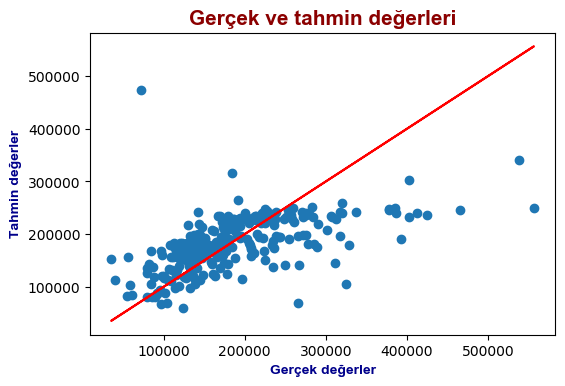

In [17]:
X_test= sm.add_constant(X_test)
Y_preds= sonuclar.predict(X_test)

plt.figure(dpi=100)
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color="red")
plt.title("Gerçek ve tahmin değerleri", fontdict=baslik_font)
plt.xlabel("Gerçek değerler", fontdict=eksen_font)
plt.ylabel("Tahmin değerler", fontdict=eksen_font)
plt.show()

In [25]:
print("Ortalama mutlak hata (MAE): {}".format(mean_absolute_error(Y_test, Y_preds)))
print("Ortalama kare hata (MSE): {}".format(mse(Y_test, Y_preds)))
print("Kök ortalama kare hata (RMSE): {}".format(rmse(Y_test, Y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((Y_test - Y_preds) / Y_test)) * 100))

Ortalama mutlak hata (MAE): 44566.562975375135
Ortalama kare hata (MSE): 4211604896.7359853
Kök ortalama kare hata (RMSE): 64896.87894449151
Ortalama Mutlak Yüzde Hata (MAPE) : 27.051322630248293
